In [35]:
import pandas as pd
import time
import datetime
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt

In [60]:
key = 'c9f5b49eab51e5a3a98bae35a9bcbb88'
weather_cache = {}

In [78]:
def get_weather_data(prediction_time):
    if prediction_time in weather_cache:
        return weather_cache[prediction_time]
    sim_center = key, 35.042677, -85.299246
    sim_center = forecast(*sim_center, time=prediction_time.isoformat())
    weather_cache[prediction_time] = sim_center['currently']
    return sim_center['currently']

In [79]:
def convert_time(str_time):
    return dt.strptime(str_time, "%Y-%m-%d %H:%M:%S")

def first_cleansing_step(data):
    data['Time'] = data['Time'].apply(convert_time)
    return data

def filter_weather(weather):
    return weather

In [ ]:
pd.DataFrame(weather_cache).to_csv

In [90]:
def add_weather(dataset):
    res = []
    for _, item in dataset.iterrows():
        weather_data = get_weather_data(item["Time"])
        res.append({**item, **weather_data})
    return res

In [104]:
traffic_data = pd.read_csv("vehicles_april_2019.csv", sep=";")
pollution_data = pd.read_csv("pm_2.5_april_2019.csv", sep=";")
traffic_data = first_cleansing_step(traffic_data)
pollution_data = first_cleansing_step(pollution_data)

In [105]:
w_pollution_data = add_weather(pollution_data)

In [101]:
w_pollution_data_frame = pd.DataFrame(w_pollution_data)
w_pollution_data_frame.to_csv("weather_pollution.csv")

In [98]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [107]:
len(weather_cache)

8641

In [103]:
traffic_data

,Time,mlk-georgia-cam-3,mlk-georgia-cam-1,mlk-houston-cam-1,mlk-lindsay-cam-2,mlk-douglas-cam-1,mlk-central-cam-2,mlk-peeples-cam-3,mlk-douglas-cam-2,mlk-peeples-cam-1,mlk-magnolia-cam-2
0,2019-03-25 20:50:00,0,0,0,0,0,112,85,83,59,51
1,2019-03-25 21:00:00,0,0,0,0,0,170,64,65,47,62
2,2019-03-25 21:10:00,0,0,0,0,0,169,100,109,70,64
3,2019-03-25 21:20:00,0,0,0,0,0,184,77,84,42,39
4,2019-03-25 21:30:00,0,0,0,0,0,139,77,99,67,50
5,2019-03-25 21:40:00,0,0,0,0,0,158,76,99,61,62
6,2019-03-25 21:50:00,0,0,0,0,0,125,67,84,60,62
7,2019-03-25 22:00:00,0,0,0,0,0,134,98,81,73,69
8,2019-03-25 22:10:00,0,0,0,0,0,150,74,86,44,57
9,2019-03-25 22:20:00,0,0,0,0,0,111,59,64,43,44


In [7]:
def correlation_series(X, Y):
    X_mean = np.mean(X)
    X_std = np.std(X)
    Y_mean = np.mean(Y)
    Y_std = np.std(Y)
    return [(x - X_mean) * (y - Y_mean) / (X_std * Y_std) for x,y in zip(X,Y)]

In [8]:
traffic_data = pd.read_csv("traffic.csv", sep=";")
pollution_data = pd.read_csv("pollution.csv", sep=";")
traffic_data = first_cleansing_step(traffic_data)
pollution_data = first_cleansing_step(pollution_data)

Index(['Time', 'mlk-peeples', 'mlk-magnolia', 'mlk-lindsay', 'mlk-houston',
       'mlk-georgia', 'mlk-douglas', 'mlk-central'],
      dtype='object')


In [12]:
vehicles = pd.read_csv("number of vehicles.csv", sep=";")
len(vehicles), len(traffic_data)

(720, 1007)

In [56]:
traffic_data.columns

Index(['Time', 'mlk-georgia-cam-3', 'mlk-georgia-cam-1', 'mlk-houston-cam-1',
       'mlk-lindsay-cam-2', 'mlk-douglas-cam-1', 'mlk-central-cam-2',
       'mlk-peeples-cam-3', 'mlk-douglas-cam-2', 'mlk-peeples-cam-1',
       'mlk-magnolia-cam-2'],
      dtype='object')

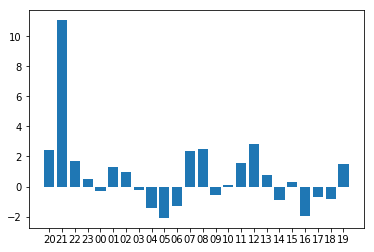

In [70]:
def plot_histogram(times, y):
    times_dict = dict()
    for time, element in zip(times, y):
        if time not in times_dict:
            times_dict[time] = (0,0)
        N =  times_dict[time][1]
        times_dict[time] = ((times_dict[time][0]*N)/(N+1) + element, N+1) 
    bins = times_dict.keys()
    values = [times_dict[item][0] for item in bins]
    plt.bar(list(bins), values, align='center')

corr = correlation_series(pollution_data["mlk-peeples"], traffic_data['mlk-peeples-cam-3'])   
plot_histogram(traffic_data['Time'], corr)

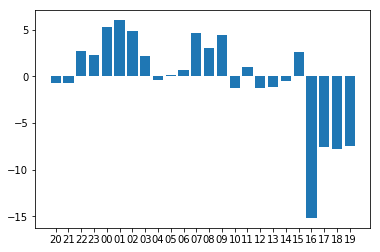

In [71]:
corr = correlation_series(pollution_data['mlk-douglas'], traffic_data['mlk-douglas-cam-1'])
plot_histogram(traffic_data['Time'], corr)